In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120493 files and direct

# **실습 2 (확률과 통계 2 & 정보이론)**
직접 문제들을 풀어보며, 기초를 다져보도록 합시다.

> ## Q1. MLE, MAP

> ## Q2. MLE, MAP 2

> ## Q3. Information Theory

> ## Q4. Information Theory 2

> ## Q5. Information Theory 3



---



# Q1. MLE & MAP

> 머신러닝 모델의 학습은 대부분 다음과 같은 식으로 귀결됩니다.
$$
\hat{\theta} = argmin_{\theta} \; \text{Loss}(\theta)
$$

> 이 중 가장 널리 쓰이는 방법은, 주어진 training data $D$ 에 가장 높은 확률을 부여하는 parameter $\theta$를 찾는 maximum likelihood estimation (MLE) 입니다.
$$
\hat{\theta}_{\text{mle}} := argmax_{\theta} \; p(D|\theta) = argmax_{\theta} \; p(D_1, D_2, ..., D_N|\theta) \quad \text{where N is the number of training data.}
$$

> $\theta_\text{mle}$를 구하기 위해서, 우리는 일반적으로 모든 training data $D$는 특정한 확률 분포로부터 **독립**적으로 sampling 되었다고 생각합니다. 만약 그렇다고 한다면, 위 식을 아래와 같이 변경할 수 있기 때문입니다.
$$
argmax_{\theta} \; p(D|\theta) = argmax_{\theta} \; p(D_1, D_2, ..., D_N|\theta) = argmax_{\theta} \prod_{n=1}^N p(D_n|\theta).
$$

> 이 가정은 iid (independent and identically distributed) 가정이라고 불립니다. Numerical stability 때문에, 우리는 위 식에 log를 씌워주게 됩니다.
$$
\; argmax_{\theta} \; \log p(D|\theta) = argmax_{\theta} \; l(\theta) = argmax_{\theta} \log \prod_{n=1}^N p(D_n|\theta) = argmax_{\theta} \sum_{n=1}^N \log p(D_i|\theta).
$$

> 마지막으로, gradient descent를 비롯한 대부분의 optimization 알고리즘들은 **loss function을 minimize**하는 형태로 이루어져 있기 때문에, 우리는 위 식의 argmax를 -argmin으로 바꿔주게 됩니다.
$$
\text{negative log likelihood} (\theta) = argmin_{\theta} \sum_{n=1}^N - \log p(D_i|\theta).
$$

> 즉, 머신러닝이나 딥러닝 모델들을 사용할 때 negative log likelihood (NLL)를 minimize 한다는 말은, true parameter $\theta$를 $\theta_\text{mle}$로 예측하겠다는 말이 됩니다. 만약 data가 윷놀이와 같이 값 하나만 있는 경우는, MLE는 다음과 같습니다.
$$
\hat{\theta}_{\text{mle}} = argmin_\theta \; \sum_{n=1}^N -log \; p(x_n|\theta)
$$

> 일반적인 머신러닝 문제의 경우 input $x$와 label $y$ (e.g., x={키,몸무게,흡연여부}, y={수명})가 주어지고, MLE는 다음과 같습니다.
$$
\hat{\theta}_{\text{mle}} = argmin_\theta \; \sum_{n=1}^N -log \; p(y_n, x_n|\theta)
$$

> ## Q1-1.
통에 사과가 20개 담겨있다. 이 20개의 사과들은, 각각 아래와 같은 정규분포로부터 sampled됐다.
$$
apple \sim N(mean=70, std=10)
$$

> 우리는 위와 같은 정규분포는 모르고, 다만 주어진 10개의 사과 각각의 무게만 알고있는 상황이다.

In [ ]:
import numpy as np

apples = np.random.normal(loc=70, scale=10, size=20)
apples

array([58.10709428, 76.58704285, 74.54613094, 60.31672323, 81.24116585,
       68.80350994, 74.31357028, 77.14921045, 73.03452946, 67.98379533,
       65.33842502, 74.80041693, 73.08795935, 75.05672178, 72.71855056,
       65.59860701, 76.51636485, 93.39719635, 84.19287574, 63.17543038])

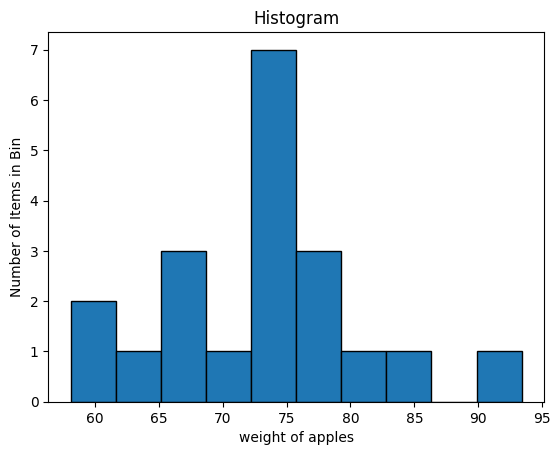

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = apples

# Create a histogram with 10 bins
plt.hist(x, bins=10, edgecolor='black')

# Label the axes
plt.xlabel('weight of apples')
plt.ylabel('Number of Items in Bin')

# Set the title
plt.title('Histogram')

# Display the plot
plt.show()


> 이때, 우리는 MLE, MAP를 통해 주어진 10개의 사과의 무게로부터, 사과의 true 정규분포의 평균과 분산 (각각 60, 10)을 맞춰보고자 한다.

> ### Q1-1-1.
만약 우리가, 표준편차는 10이라는 정보를 미리 알고있다고 생각해보자. 그러면 우리는 이 사과가 sampled된 정규분포의 평균 $\mu$(=70)만 맞추면 된다.
$$
\theta = \mu = ?
$$

> 해당 문제를 푸는 가장 단순한 방법인, MLE with grid approximation을 활용하고자 한다. (1) 사과 무게의 mean을 1부터 100까지 (우리가 생각하는 사과 무게의 최소, 최대) 전부 돌아가면서 (2) 그 mean으로 정규분포를 만든 뒤 ( $N(mean, 10)$ ) (3) likelihood를 재 보고 (4) likelihood가 maximum이 되는 mean을 고르는 것이다. 이 작업을 수행할 수 있도록, 아래 코드를 완성하시오.

> A1-1-1.

In [ ]:
from scipy.stats import norm
# grid를 만든다
apple_weight_mean_candidates = np.linspace(1, 100, 50)
print(f'weight_mean_candidates: \n {apple_weight_mean_candidates} \n')

# return: weight 50개 각각의 likelihood가 값으로 담겨있는 길이 50의 list[]
# norm의 document: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
def get_log_likelihood_grid_apprx(apples):
  log_likelihoods = []
  for mean in apple_weight_mean_candidates:
    log_likelihood = norm(mean, 10).logpdf(apples)
    log_likelihood = log_likelihood.sum()
    log_likelihoods.append(log_likelihood)
  return np.asarray(log_likelihoods)

apple_weight_mean_log_likelihoods = get_log_likelihood_grid_apprx(apples)
idx = np.argwhere(apple_weight_mean_log_likelihoods == apple_weight_mean_log_likelihoods.max())[0]
mle_apple_weight = apple_weight_mean_candidates[idx][0]

print(f'Maximum likelihood estimate: {mle_apple_weight:.3f}')


weight_mean_candidates: 
 [  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ] 

Maximum likelihood estimate: 73.735


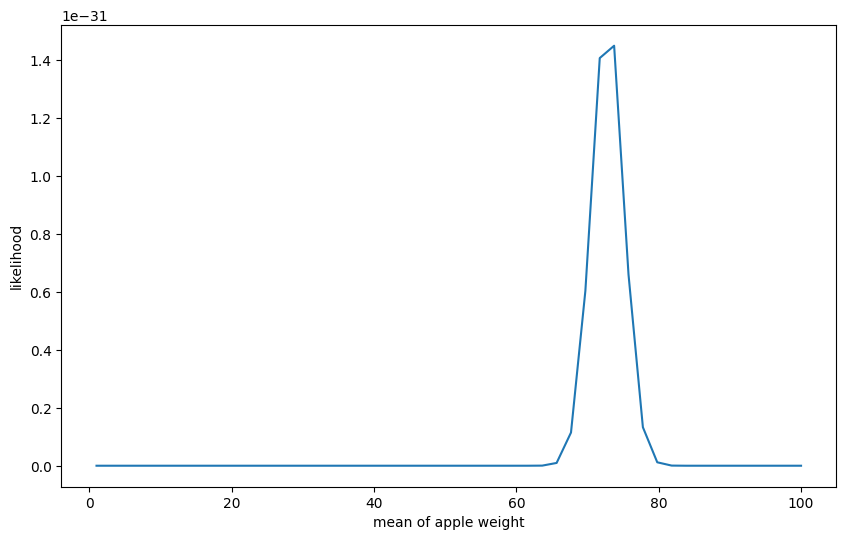

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create your data here
mean = apple_weight_mean_candidates
likelihood = np.exp(apple_weight_mean_log_likelihoods)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(mean, likelihood)

# You can set the labels for the x and y axes
plt.xlabel('mean of apple weight')
plt.ylabel('likelihood')

# Display the plot
plt.show()


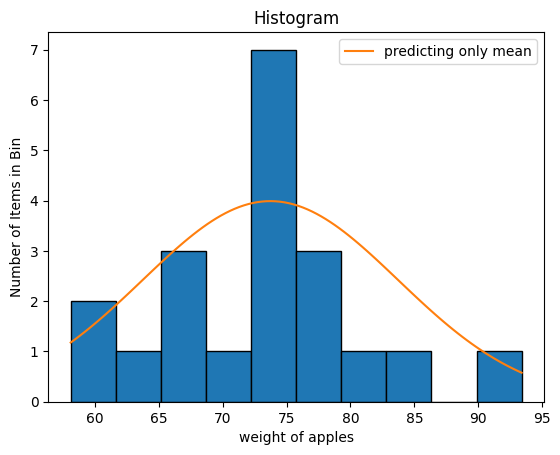

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = apples

# Create a histogram with 10 bins
plt.hist(x, bins=10, edgecolor='black')

# mle_normalD
x_range = np.linspace(min(x),max(x),100)
plt.plot(x_range, norm.pdf(x_range, mle_apple_weight, 10)*100, label='predicting only mean')  # visualize를 위해 X100배 해줌

# Label the axes
plt.xlabel('weight of apples')
plt.ylabel('Number of Items in Bin')

# Set the title
plt.title('Histogram')
plt.legend()

# Display the plot
plt.show()


> ### Q1-1-2.
만약 우리가, 평균, 표준편차를 둘다 맞춰야하는 상황이라고 가정해보자 ($\mu$(=70), $\sigma$=10 둘다 맞춰야함).
$$
\theta = \{\mu, \sigma\} = ?
$$

> Q1-1-1과 같이, MLE로 $\mu, \sigma$를 맞춰볼 것이다. 아래 코드를 완성하시오

> A1-1-2.


In [ ]:
from scipy.stats import norm, invgamma
# grid를 만든다. 총 50*50=2500개의 grid가 생긴다.
apple_weight_mean_candidates = np.linspace(1, 100, 50)
apple_weight_std_candidates = np.linspace(0.1, 20, 50)

# return: weight 50개 각각의 likelihood가 값으로 담겨있는 길이 50의 list[]
# norm의 document: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
def get_log_likelihood_grid_apprx(apples):
  log_likelihoods = []
  for mean in apple_weight_mean_candidates:
    mean_log_likelihoods = []
    for std in apple_weight_std_candidates:
      log_likelihood = norm(mean, std).logpdf(apples)
      log_likelihood = log_likelihood.sum()
      mean_log_likelihoods.append(log_likelihood)
    log_likelihoods.append(mean_log_likelihoods)
  return np.asarray(log_likelihoods)

apple_weight_log_likelihoods = get_log_likelihood_grid_apprx(apples)
idx = np.argwhere(apple_weight_log_likelihoods == apple_weight_log_likelihoods.max())[0]
mean_idx = idx[0]
std_idx = idx[1]
mle_apple_weight_mean = apple_weight_mean_candidates[mean_idx]
mle_apple_weight_std = apple_weight_std_candidates[std_idx]

print(f'Maximum likelihood estimate (mean): {mle_apple_weight_mean:.3f}')
print(f'Maximum likelihood estimate (std): {mle_apple_weight_std:.3f}')

Maximum likelihood estimate (mean): 73.735
Maximum likelihood estimate (std): 8.222


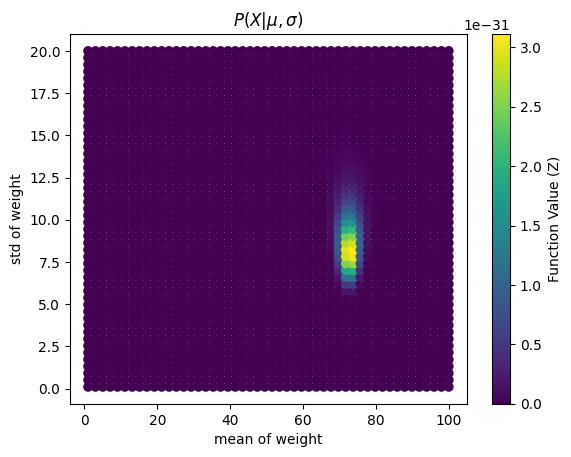

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create your data here
mean = apple_weight_mean_candidates.repeat(50, axis=0)
std = np.tile(apple_weight_std_candidates, 50)
likelihood = np.exp(apple_weight_log_likelihoods).reshape(-1)

# Create a scatter plot
plt.scatter(mean, std, c=likelihood, cmap='viridis')

# Add a colorbar to show the scale for the colors
plt.colorbar(label='Function Value (Z)')

# Label the axes
plt.xlabel('mean of weight')
plt.ylabel('std of weight')

# Set the title
plt.title('$P(X|\mu, \sigma)$')

# Display the plot
plt.show()

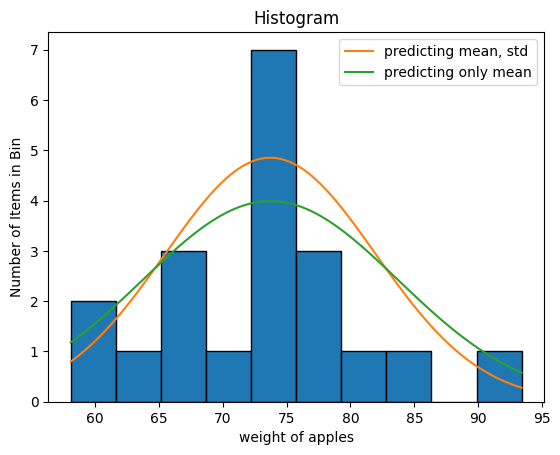

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = apples

# Create a histogram with 10 bins
plt.hist(x, bins=10, edgecolor='black')

# mle_normalD
x_range = np.linspace(min(x),max(x),100)
plt.plot(x_range, norm.pdf(x_range, mle_apple_weight_mean, mle_apple_weight_std)*100, label='predicting mean, std')  # visualize를 위해 X100배 해줌
plt.plot(x_range, norm.pdf(x_range, mle_apple_weight_mean, 10)*100, label='predicting only mean')  # visualize를 위해 X100배 해줌

# Label the axes
plt.xlabel('weight of apples')
plt.ylabel('Number of Items in Bin')

# Set the title
plt.title('Histogram')
plt.legend()

# Display the plot
plt.show()


> ## Q1-2.
만약 우리가, 사과 무게의 평균, 분산에 대한 특정한 정보를 알고있다고 생각해보자. 예를 들면, 우리는 사과가 갑자기 10kg일리는 없다는 prior knowledge를 갖고있다. 이 문제에선, 우리는 사과의 무게의 평균, 분산이 다음과 같을 것이라는 prior가 있다고 생각해보자.

$$
P(\mu = \text{mean of apple weight}) \sim N(85, 40) \\
P(\sigma = \text{std of apple weight}) \sim N(3, 1)
$$

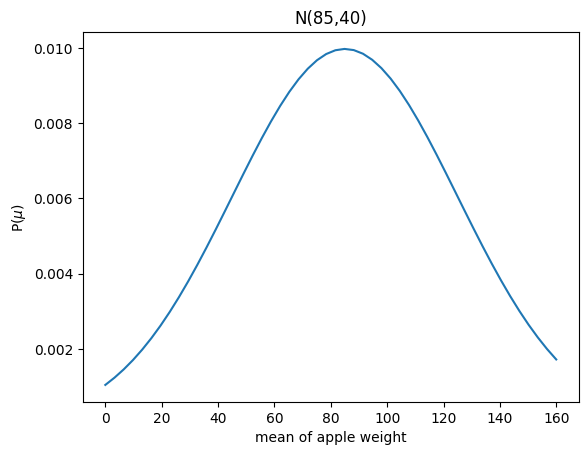

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(0,160,50)
y = norm.pdf(x, 85, 40)
plt.plot(x,y)

# Label the axes
plt.xlabel('mean of apple weight')
plt.ylabel(f'P($\mu$)')

# Set the title
plt.title('N(85,40)')

# Display the plot
plt.show()

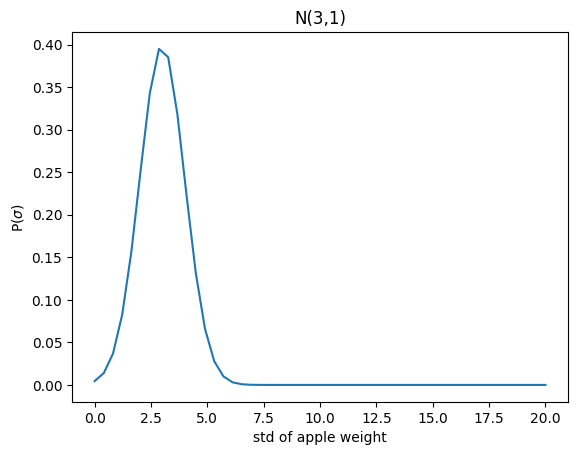

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import invgamma

# Data
x = np.linspace(0,20,50)
y = norm.pdf(x, 3, 1)
plt.plot(x,y)

# Label the axes
plt.xlabel('std of apple weight')
plt.ylabel(f'P($\sigma$)')

# Set the title
plt.title('N(3,1)')

# Display the plot
plt.show()

> 이러한 사정 정보 (prior)를 활용한다면, 우리가 궁극적으로 구하고자 하는 $P(\mu, \sigma | X)$를 예측함에 있어서 더욱 도움이 될 수 있다.

> ### Q1-2-1. 이제 이 prior를, Q1-1-2에서 구한 maximum likelihood와 결합하여, MAP estimate을 하려고 한다. 다음 빈칸을 채워보시오.

> A1-2-1.



In [ ]:
from scipy.stats import norm, invgamma
# likelihood 계산을 위한 grid를 만든다. 총 50*50=2500개의 grid가 생긴다.
apple_weight_mean_candidates = np.linspace(1, 100, 100)
apple_weight_std_candidates = np.linspace(0.1, 20, 100)

# return: weight 50개 각각의 likelihood가 값으로 담겨있는 길이 50의 list[]
# norm의 document: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
def get_log_likelihood_grid_apprx(apples):
  # TODO: 1-1-2위에서 구한 code를 붙여넣으시오
  log_likelihoods = []
  for mean in apple_weight_mean_candidates:
    mean_log_likelihoods = []
    for std in apple_weight_std_candidates:
      log_likelihood = norm(mean, std).logpdf(apples)
      log_likelihood = log_likelihood.sum()
      mean_log_likelihoods.append(log_likelihood)
    log_likelihoods.append(mean_log_likelihoods)
  return np.asarray(log_likelihoods)

apple_weight_log_likelihoods = get_log_likelihood_grid_apprx(apples)

# get mle results
mle_idxes = np.argwhere(apple_weight_log_likelihoods == apple_weight_log_likelihoods.max())[0]
mle_mean_idx = mle_idxes[0]
mle_std_idx = mle_idxes[1]
mle_apple_weight_mean = apple_weight_mean_candidates[mle_mean_idx]
mle_apple_weight_std = apple_weight_std_candidates[mle_std_idx]
print(f'Maximum likelihood estimate (mean): {mle_apple_weight_mean:.3f}')
print(f'Maximum likelihood estimate (std): {mle_apple_weight_std:.3f}')


# prior distributions
log_prior_mean_weight = norm(85, 40).logpdf(apple_weight_mean_candidates)
log_prior_std_weight = norm(3, 1).logpdf(apple_weight_std_candidates)
log_prior_grid = np.add.outer(log_prior_mean_weight, log_prior_std_weight)  # prior의 grid를 만든다

def get_map(log_likelihoods, log_prior_grid):
  log_posterior = log_likelihoods + log_prior_grid
  idx = np.argwhere(log_posterior == log_posterior.max())[0]
  map_mean_idx, map_std_idx = idx
  map_apple_weight_mean = apple_weight_mean_candidates[map_mean_idx]
  map_apple_weight_std = apple_weight_std_candidates[map_std_idx]
  return  map_apple_weight_mean,  map_apple_weight_std, log_posterior

map_mean, map_std, log_posterior = get_map(apple_weight_log_likelihoods, log_prior_grid)

# print(f'idx: mean: {idxes[0]}, std: {idxes[1]}')
print(f'Maximum A Posterior (mean): {map_mean:.3f}')
print(f'Maximum A Posterior (std): {map_std:.3f}')

Maximum likelihood estimate (mean): 73.000
Maximum likelihood estimate (std): 8.140
Maximum A Posterior (mean): 73.000
Maximum A Posterior (std): 5.929


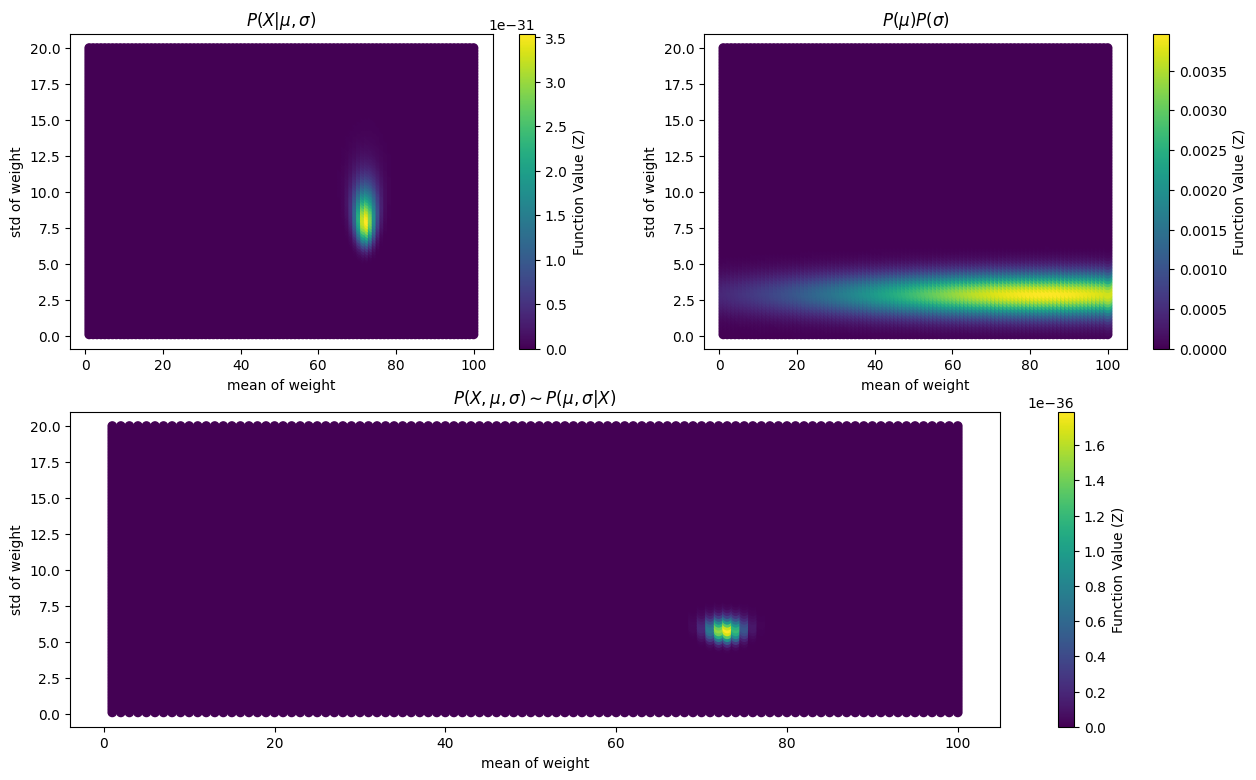

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create your data here
mean = apple_weight_mean_candidates.repeat(100, axis=0)
std = np.tile(apple_weight_std_candidates, 100)
likelihood = np.exp(apple_weight_log_likelihoods).reshape(-1)

plt.figure(figsize=(15,9))
# Create a scatter plot
plt.subplot(2,2,1)
plt.scatter(mean, std, c=likelihood, cmap='viridis')
plt.colorbar(label='Function Value (Z)')
plt.xlabel('mean of weight')
plt.ylabel('std of weight')
plt.title('$P(X|\mu, \sigma)$')

prior = np.exp(log_prior_grid).reshape(-1)

plt.subplot(2,2,2)
plt.scatter(mean, std, c=prior, cmap='viridis')
plt.colorbar(label='Function Value (Z)')
plt.xlabel('mean of weight')
plt.ylabel('std of weight')
plt.title('$P(\mu)P(\sigma)$')


posterior = np.exp(log_posterior)
plt.subplot(2,1,2)
plt.scatter(mean, std, c=posterior, cmap='viridis')
plt.colorbar(label='Function Value (Z)')
plt.xlabel('mean of weight')
plt.ylabel('std of weight')
plt.title('$P(X, \mu, \sigma) \sim P(\mu, \sigma | X)$')


# Display the plot
plt.show()

> ### Q1-2-2. 위 코드에서 prior를 바꿔보며 (e.g., $P(\mu), P(\sigma)$의 평균 분산을 변경, 혹은 정규분포가 아닌 다른 분포로 변경) 어떻게 결과가 달라지는지 확인해보시오.

> A1-2-2.





---



# Q2. MLE & MAP
앞면, 뒷면이 나올 확률이 0.5인, 즉 공평한 동전이 있다. 하지만 우리는 동전의 앞면이 나올 확률을 미리 알지는 못하고, 동전을 여러번 던져서 실제로 나온 결과 (e.g., 앞앞앞뒤뒤앞뒤) 만 관측할 수 있다. 이때 우리는 MLE, MAP를 써서, 주어진 data (동전을 던져서 나온 결과들) 로부터 실제 parameter (0.5) 를 맞추고자 한다.

> Q-1에서는 우리는 사과의 무게를 정규분포로 모델링하였다. Q2에서는, 딱 두 값,
$$\hat{\theta} = 0.3 \text{ or } 0.6$$ 만을 $\theta$의 후보군으로 두고자 한다.

> Note: $P_{\hat{\theta}}[heads]=\hat{\theta}$




##Q2-1.
>동전을 3번 던져서, 앞이 1번 뒷면이 2번 나왔다고 해보자. 이 경우, $\theta$를 maximum likelihood estimate로 추론했을 때, 0.3과 0.6중 더 적합한 (즉, likelihood가 높은) 값은 무엇인지 구하시오.

> A2-1.
$$
\theta=argmax_{\theta \in \{0.3,0.6\}} \; P_\theta(D) \\
= \theta=argmax_{\theta \in \{0.3,0.6\}} \; P_\theta[heads]^2P_\theta[tails] \\
= \theta=argmax_{\theta \in \{0.3,0.6\}} \; \theta(1-\theta)^2
$$

> 이때 $\theta$가 0.3, 0.6일 경우 계산해보면 $\theta=0.3$일 때 값이 더 크게 나온다. 따라서 MLE로 예측했을 경우 $\theta=0.3$이다.

##Q2-2.
>동전을 3번 던져서, 앞이 1번 뒷면이 2번 나왔다고 해보자. 추가적으로, 우리는 동전에 관한 사전 지식을 갖고 있는데, 다음과 같다.
$$
P[\theta=0.3]=0.3 \text{ and } P[\theta=0.6]=0.7
$$

> 이 경우, $\theta$를 maximum a posteriori로 추론했을 때, 0.3과 0.6중 더 적합한 값은 무엇인지 구하시오.

> A2-2.
$$
\theta=argmax_{\theta \in \{0.3,0.6\}} \; P_\theta(D)P[\theta] \\
= \theta=argmax_{\theta \in \{0.3,0.6\}} \; \theta(1-\theta)^2P[\theta]
$$

> 이때 $\theta$가 0.3, 0.6일 경우 계산해보면 $\theta=0.6$일 때 값이 더 크게 나온다. 따라서 MLE로 예측했을 경우 $\theta=0.6$이다.

##Q2-3.
> 이번엔 동전이 3번이 아니라, 무수히 많이 던진다고 해보자 (sampling 횟수가 매우 크다). 이 경우에는, 0.3, 0.6 둘 중 $\theta$의 maximum likelihood estimate은 어떤 값이 될까?

> A2-3.
이 동전은 앞,뒷면이 나올 확률이 50%인 동전이므로, 무수히 많이 던진다면 대략 앞이 절반, 뒷면이 절반정도 나올 것이다. 따라서 다음과 같이 계산할 수 있다.
$$
\theta=argmax_{\theta \in \{0.3,0.6\}} \; P_\theta[heads]^NP_\theta[tails]^N \\
\theta=0.3 \rightarrow (0.3)^N(0.7)^N = (0.21)^N \\
\theta=0.6 \rightarrow (0.6)^N(0.4)^N = (0.24)^N
$$
위 값으로부터 $\theta$=0.6이 선택될 것임을 알 수 있다.

##Q2-4.
> 이번엔 동전이 3번이 아니라, 무수히 많이 던진다고 해보자 (sampling 횟수가 매우 크다). 이 경우에는, 0.3, 0.6 둘 중 $\theta$의 MAP는 어떤 값이 될까? (prior는 Q2-2와 같다).

> A2-4.
A2-3과 마찬가지로 0.6이 선택된다. 왜냐하면 $N \rightarrow ∞$이므로, prior를 한번 곱해주는 것의 영향이 없어지기 때문이다.
$$
\theta=0.3 \rightarrow (0.3)^N(0.7)^N (0.3) = (0.21)^N * (0.3)\\
\theta=0.6 \rightarrow (0.6)^N(0.4)^N (0.7) = (0.24)^N * (0.7)
$$
위 값으로부터 $\theta$=0.6이 선택될 것임을 알 수 있다.

# Q3. Information theory 1
> 다음 random variables의 entropy를 구하시오.

## Q3-1.

> 0~255까지의 정수 중 하나의 값을 갖는 pixel value X. 각 값을 가질 확률은 1/256의 확률로 모두 동일하다.

> A3-1.
$$
H(X) = -\sum_{i=1}^{256} (1/256) \; (\log_2(1/256)) \\
= -1/256 * 256 * (-8) = 8
$$

## Q3-2.

>
$$
X =
\begin{cases}
\text{사람은 포유류임} \qquad \; \; \, \text{p=1} \\
\text{사람은 포유류가 아님} \quad \text{p=0}
\end{cases}
$$

> A3-2.
$$
H(X) = 0 + 1*log_2 1 = 0
$$

## Q3-3.

> 내일의 날씨 $X$
$$
X =
\begin{cases}
맑음 \quad \text{  p=1/4} \\
비 \quad \; \; \, \text{  p=1/4} \\
흐림 \quad \text{  p=1/2}
\end{cases}
$$

> A3-3.
$$
H(X) = -(1/4)(-2) - (1/4)(-2) - (1/2)(-1) = 1.5
$$

# Q4. Information theory 2
> 다음 표에 주어진 값을 joint pmf로 갖는 두 discrete random variable X ($\in \{0,1\}$), Y ($\in \{0,1,2\}$)가 있다. Joint distribution function은
$$
P(x,y) = K (x+y)
$$
와 같다.

|  K(x+y)     | Y=0 | Y=1 | Y=2 |
| ----------- | ----------- | ----------- | ----------- |
| X = 0      | 0       | K | 2K |
| X = 1   | K        | 2K | 3K |


## Q4-1. K를 구하시오

> A4-1.
K=1/9

## Q4-2. H(X), H(Y)를 구하시오

> A4-1.
$$
\text{probability distribution of } X \rightarrow [1/3, 2/3] \\
H(X) = 1/3\log(3) + 2/3 \log(3/2) = \log 3 - 2/3 = 0.9183
$$


>
$$
\text{probability distribution of } Y \rightarrow [1/9, 3/9, 5/9] \\
H(X) = 1/9\log(9) + 3/9 \log(3) + 5/9 \log(9/5) = 15/9 \log 3 - 5/9 \log 5 = 1.3516
$$


## Q4-3. H(X,Y), I(X;Y)를 구하시오

> A4-3.
$$
H(X,Y) = H(0, 1/9, 2/9, 1/9, 2/9, 3/9) \\
= 0 + 1/9 \log(9) + 2/9 \log(9/2) + 1/9 \log(9) + 2/9 \log(9/2) + 3/9 \log(9/3)
= 15/9 \log(3) - 2/9
$$

>
$$
I(X;Y) = H(X) + H(Y) - H(X,Y) = log 3 - 5/9log 5 - 2/9 = 0.0728
$$


# Q5. Information theory 3
 >다음 두개의 discrete한 확률분포가 주어졌다고 하자.
$$
p = [p_1, p_2, ..., p_n] \in R^n \\
q = [q_1, q_2, ..., q_n] \in R^n \\
$$

> 이때, $p$는 c번째 element만 1이고 나머지 element는 0인 one-hot vector라고 하자.
$$
p = [0, 0, ..., 1(c번째), ..., 0]
$$

> 또한 $q$는 각 class (총 n개의 class가 존재)에 대한 예측 확률이라고 하자.
$$
q = [\text{0.x, 0.x, ..., 0.x}]
$$
예를 들면, n=3이고 (총 class의 개수는 3), 1번 class는 고양이, 2번 class는 강아지, 3번 class는 펭귄이다. 만약 고양이의 image를 머신러닝 모델의 input으로 넣어주었다면, $p$와 $q$는 다음과 같다.
$$
p = [1,0,0] \\
q = [0.3, 0.5 ,0.2]
$$
이 뜻은, 우리 모델은 이 image (고양이) 가 고양이일 확률은 0.3, 강아지일 확률은 0.5, 펭귄일 확률은 0.2라고 예측하는 상황이다 (즉 잘 못하고 있다).


## Q5-1.

> 위와 같이 p는 고양이 image의 class를 나타내는 one-hot vector이고, q는 우리의 모델이 내뱉은 해당 image가 각 class일 확률이라고 하자. 이때, $KL(p||q)$를 entropy와 cross-entropy의 합(or 차)로 분리 후, 필요없는 항을 제거하시오 (i.e., simple한 form으로 정리하시오).

> A5-1.
$$
KL(p||q) = E_{x\sim p(x)}\;[log(p(x)/q(x))] \\
= \sum_{i=1}^n p(i) \; \log (p(x)/q(x)) \\
= \log (1/q_c) = -\log q_c
$$

## Q5-2.

> p와 q 사이의 cross-entropy를 구하고, 이것이 Q3-1과 같다는 것을 보이시오.

> A5-2.
$$
CE(P,Q) = -\sum_{i=1}^n p_i \log q_i = -\log q_c. \\
KL(P||Q) = CE(P,Q) - H(P) = CE(P,Q) - 0 = CE(P,Q)
$$

## Q5-3.
> 아래 그림은 KL diveregence를 줄임으로써, continuous distribution $q$ (빨강) 를 continuous distribution $p$ (파랑) fitting시킨 결과이다.

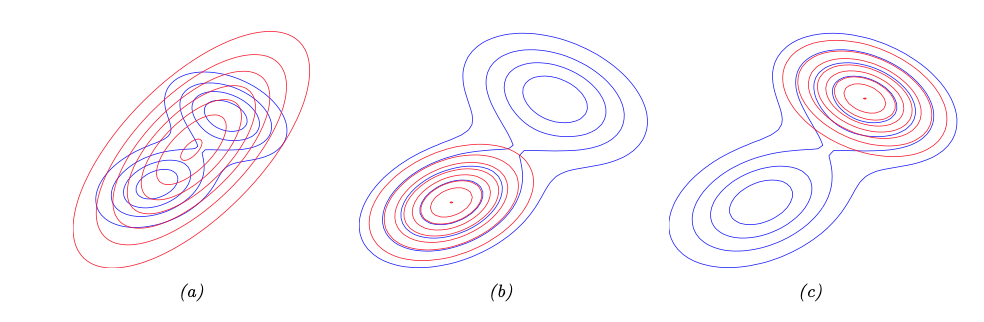

> KL divergence를 줄이는 방법으로는, (1) KL(p||q)를 줄이는 방법과, (2) KL(q||p)를 줄이는 방법이 있다. 위 (a,b,c)는 각각 (1)과 (2) 중 어떤 방법으로 KL divergence를 줄였을 지 맞추시오.

>A5-3.
(a)는 (1), (b,c)는 (2)이다.

> (1)의 경우, $p_i$가 0보다 큰 $i$에 대해 $q_i$가 0인 구간을 없애려고 한다. 따라서 (a)처럼, $p_i$>0인 모든 값에 대해 $q_i$>0임을 알 수 있다.

> (2)의 경우, $q_i$가 0보다 큰 $i$에 대해, $p_i$가 0인 구간이 존재하면, KL(q||p)가 발산하게 된다. 따라서, (b,c)처럼 모든 $q_i>0$인 i에 대해 $p_i$가 0보다 큰 값을 가지게 된다.

# Reference

1. http://www.bdhammel.com/mle-map/
2. https://www.cs.cmu.edu/~aarti/Class/10601/
3. https://www.cl.cam.ac.uk/teaching/1920/InfoTheory/Exercises1-4_with_Solns.pdf